In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("geotracker_sites_2024-11-01.csv", encoding='latin1')
df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaN,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31T00:00:00Z,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18T00:00:00Z,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01T00:00:00Z,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


In [5]:
df.dtypes

GLOBAL_ID                             object
BUSINESS_NAME                         object
STREET_NUMBER                         object
STREET_NAME                           object
CITY                                  object
STATE                                 object
ZIP                                   object
COUNTY                                object
EPA_REGION                             int64
LATITUDE                             float64
LONGITUDE                            float64
COORDINATE_SOURCE                     object
CASE_TYPE                             object
STATUS                                object
STATUS_DATE                           object
CLAIM_NO                              object
CLAIM_STATUS                          object
LEAD_AGENCY                           object
CASEWORKER                            object
LOCAL_AGENCY                          object
RB_CASE_NUMBER                        object
LOC_CASE_NUMBER                       object
FILE_LOCAT

In [17]:
df['MILITARY_DOD_SITE'].value_counts()

MILITARY_DOD_SITE
No     67723
Yes     7340
Name: count, dtype: int64

In [18]:
df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION'],
      dtype='object')

In [19]:
df['COUNTY'].sort_values(na_position='first')

1463      NaN
6759      NaN
39589     NaN
44398     NaN
57949     NaN
         ... 
40711    Yuba
65899    Yuba
57071    Yuba
71824    Yuba
39086    Yuba
Name: COUNTY, Length: 75063, dtype: object

In [22]:
  nan_in_col1 = df['COUNTY'].isna()
print(nan_in_col1)

0        False
1        False
2        False
3        False
4        False
         ...  
75058    False
75059    False
75060    False
75061    False
75062    False
Name: COUNTY, Length: 75063, dtype: bool


In [27]:
the_filter=df['DISADVANTAGED_COMMUNITY']== 'NaN'

the_filter

0        False
1        False
2        False
3        False
4        False
         ...  
75058    False
75059    False
75060    False
75061    False
75062    False
Name: DISADVANTAGED_COMMUNITY, Length: 75063, dtype: bool

In [28]:
df[the_filter]

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION


In [46]:
filtered_df_A = df['DISADVANTAGED_COMMUNITY'].notnull() & (df["COUNTY"]=="Los Angeles")
print(filtered_df_A)

0        False
1        False
2        False
3        False
4        False
         ...  
75058    False
75059    False
75060    False
75061    False
75062    False
Length: 75063, dtype: bool


In [48]:
los_ang_df = df[filtered_df_A]
los_ang_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
44,T10000004704,CIRCLE K STORES INC. #2211300,18999,COLIMA ROAD E,ROWLAND HEIGHTS,CA,91748,Los Angeles,9,33.987827,...,NaN,NaN,San Gabriel River - Upper San Gabriel (405.20),San Gabriel Valley (4-013),Disadvantaged Community,66-70%,75-80%,No,NaN,LOS ANGELES RWQCB (REGION 4)
46,T0603743664,I-CHEM INTERNATIONAL (FORMER),1455,16TH ST. W.,LONG BEACH,CA,90813-1325,Los Angeles,9,33.787554,...,NaN,NaN,Los Angeles River - Los Angeles (412.10),Coastal Plain Of Los Angeles - West Coast (4-0...,Severely Disadvantaged Community,NaN,NaN,No,NaN,LOS ANGELES RWQCB (REGION 4)
100,NPD100051952,Terminal Island Water Reclamation Plant,445,Ferry Street,San Pedro,CA,90731,Los Angeles,9,33.748967,...,NaN,NaN,Dominguez Channel (411.03),Coastal Plain Of Los Angeles - West Coast (4-0...,Severely Disadvantaged Community,NaN,NaN,No,NaN,LOS ANGELES RWQCB (REGION 4)
239,T10000008029,Air Force Plant 42 - Basewide,2503,East Ave P,Palmdale,CA,93550,Los Angeles,9,34.602360,...,NaN,NaN,Antelope - Lancaster (626.50),Antelope Valley (6-044),Severely Disadvantaged Community,NaN,NaN,Yes,NaN,LAHONTAN RWQCB (REGION 6V)
276,T0603701265,RANCHO LOS AMIGOS HOSPITAL (SOUTH CAMPUS),7600,AMIGOS AVE,DOWNEY,CA,90242,Los Angeles,9,33.923331,...,NaN,NaN,Los Angeles River - Los Angeles (412.10),Coastal Plain Of Los Angeles - Central (4-011.04),Severely Disadvantaged Community,NaN,NaN,No,NaN,LOS ANGELES RWQCB (REGION 4)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74888,SL2045A1614,Boeing - Parcels 2 & 4,200,E. STANLEY ST,COMPTON,CA,NaN,Los Angeles,9,33.873190,...,NaN,NaN,Los Angeles River - Los Angeles (412.10),Coastal Plain Of Los Angeles - Central (4-011.04),Disadvantaged Community,96-100% (highest scores),90-95%,No,NaN,LOS ANGELES RWQCB (REGION 4)
74950,T0603701213,"AM PM SPECIAL DELIVERY SERVICE, INC.",11223,VENICE BLVD,LOS ANGELES,CA,90066,Los Angeles,9,34.012935,...,NaN,2010-09-07T00:00:00Z,Santa Monica Bay - Interior Santa Monica Bay -...,Coastal Plain Of Los Angeles - Santa Monica (4...,Disadvantaged Community,61-65%,45-50%,No,NaN,LOS ANGELES RWQCB (REGION 4)
74959,T0603704063,WESTERN AMERICAN FOREST,200,WILLOW AVE N,INDUSTRY,CA,91746,Los Angeles,9,34.042658,...,NaN,1994-05-18T00:00:00Z,San Gabriel River - Upper San Gabriel (405.20),San Gabriel Valley (4-013),Disadvantaged Community,86-90%,90-95%,No,NaN,LOS ANGELES RWQCB (REGION 4)
75005,T0603701787,TRANSIT MIXED CONCRETE COMPANY,2400,SOUTH ST,LONG BEACH,CA,90805,Los Angeles,9,33.859923,...,NaN,1997-04-16T00:00:00Z,San Gabriel River - Lower San Gabriel - Centra...,Coastal Plain Of Los Angeles - Central (4-011.04),Disadvantaged Community,91-95%,85-90%,No,NaN,LOS ANGELES RWQCB (REGION 4)


In [34]:
filtered_df_A = df['DISADVANTAGED_COMMUNITY'].isnull()
print(filtered_df_A)

0         True
1         True
2         True
3        False
4         True
         ...  
75058    False
75059     True
75060     True
75061     True
75062     True
Name: DISADVANTAGED_COMMUNITY, Length: 75063, dtype: bool


In [35]:
df[filtered_df_A ]

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
8,SL603799522,TONY'S MUFFLERS AND RADIATORS,1240 and 1340,W. VALLEY,ALHAMBRA,CA,91803,Los Angeles,9,34.077549,...,NaN,NaN,Los Angeles River - Raymond - Pasadena (412.31),San Gabriel Valley (4-013),NaN,66-70%,70-75%,No,NaN,LOS ANGELES RWQCB (REGION 4)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75057,T0606900041,AIELLO MASONREY,1035,NASH RD,HOLLISTER,CA,95023,San Benito,9,36.839939,...,NaN,1998-12-16T00:00:00Z,Pajaro River - South Santa Clara Valley (305.30),Gilroy-Hollister Valley - North San Benito (3-...,NaN,51-55%,65-70%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31T00:00:00Z,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18T00:00:00Z,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01T00:00:00Z,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


In [6]:
df['RWQCB_REGION'].unique()

array(['CENTRAL COAST RWQCB (REGION 3)', 'NORTH COAST RWQCB (REGION 1)',
       'CENTRAL VALLEY RWQCB (REGION 5F)',
       'SAN FRANCISCO BAY RWQCB (REGION 2)',
       'COLORADO RIVER BASIN RWQCB (REGION 7)',
       'CENTRAL VALLEY RWQCB (REGION 5S)', 'LOS ANGELES RWQCB (REGION 4)',
       nan, 'SAN DIEGO RWQCB (REGION 9)', 'SANTA ANA RWQCB (REGION 8)',
       'LAHONTAN RWQCB (REGION 6T)', 'LAHONTAN RWQCB (REGION 6V)',
       'CENTRAL VALLEY RWQCB (REGION 5R)'], dtype=object)

In [7]:
df['RWQCB_REGION'].value_counts()

RWQCB_REGION
SAN FRANCISCO BAY RWQCB (REGION 2)       17281
LOS ANGELES RWQCB (REGION 4)             15750
CENTRAL VALLEY RWQCB (REGION 5S)          7965
SAN DIEGO RWQCB (REGION 9)                7829
SANTA ANA RWQCB (REGION 8)                5651
CENTRAL VALLEY RWQCB (REGION 5F)          5333
CENTRAL COAST RWQCB (REGION 3)            3897
NORTH COAST RWQCB (REGION 1)              3440
LAHONTAN RWQCB (REGION 6V)                2288
CENTRAL VALLEY RWQCB (REGION 5R)          1436
COLORADO RIVER BASIN RWQCB (REGION 7)     1280
LAHONTAN RWQCB (REGION 6T)                 489
Name: count, dtype: int64

In [8]:
df['CALENVIROSCREEN4_SCORE'].unique()

array(['45-50%', '20-25%', '35-40%', '95-100% (highest scores)', '80-85%',
       '40-45%', '70-75%', nan, '30-35%', '90-95%',
       '1-5% (lowest scores)', '15-20%', '60-65%', '10-15%', '85-90%',
       '65-70%', '50-55%', '75-80%', '55-60%', '5-10%', '25-30%'],
      dtype=object)

In [9]:
df['CALENVIROSCREEN4_SCORE'].value_counts()

CALENVIROSCREEN4_SCORE
95-100% (highest scores)    4837
80-85%                      4652
50-55%                      4378
90-95%                      4324
55-60%                      4179
70-75%                      4100
45-50%                      3992
75-80%                      3974
60-65%                      3907
85-90%                      3730
30-35%                      3407
40-45%                      3323
65-70%                      3304
25-30%                      3123
35-40%                      3113
20-25%                      2635
15-20%                      2604
10-15%                      2370
1-5% (lowest scores)        1962
5-10%                       1892
Name: count, dtype: int64

In [30]:
df.drop(columns =['FACILITY_PROJECT_SUBTYPE'])

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaN,NaN,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,NaN,1999-03-31T00:00:00Z,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,NaN,2013-03-18T00:00:00Z,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Close and Remove Tank,Tank removed,2009-04-01T00:00:00Z,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,SAN DIEGO RWQCB (REGION 9)


In [28]:
df[['RWQCB_REGION', 'CALENVIROSCREEN4_SCORE']]

,RWQCB_REGION,CALENVIROSCREEN4_SCORE
0,CENTRAL COAST RWQCB (REGION 3),45-50%
1,NORTH COAST RWQCB (REGION 1),20-25%
2,CENTRAL COAST RWQCB (REGION 3),35-40%
3,CENTRAL VALLEY RWQCB (REGION 5F),95-100% (highest scores)
4,SAN FRANCISCO BAY RWQCB (REGION 2),35-40%
...,...,...
75058,CENTRAL VALLEY RWQCB (REGION 5S),60-65%
75059,SAN DIEGO RWQCB (REGION 9),45-50%
75060,NORTH COAST RWQCB (REGION 1),10-15%
75061,SAN DIEGO RWQCB (REGION 9),55-60%


In [31]:
df.sample(5)

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
4837,SL0607534880,ERIE AUTO REPAIR,3014,18TH STREET,SAN FRANCISCO,CA,94110,San Francisco,9,37.761841,...,Removal of system,2013-09-23T00:00:00Z,South Bay - San Mateo Bayside (204.40),Downtown (2-040),NaN,31-35%,50-55%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
67936,T10000012340,2275 Broadway Street,2275,Broadway Street,San Francisco,CA,94115,San Francisco,9,37.794230,...,NaN,2018-11-20T00:00:00Z,Bay Bridges - San Francisco Bayside (203.40),Downtown (2-040),NaN,1-5% (lowest scores),10-15%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
31227,T10000012221,Xtreme Car Wash,1264,Third Avenue,Chula Vista,CA,91911,San Diego,9,32.608130,...,NaN,NaN,NaN,NaN,Severely Disadvantaged Community,51-55%,60-65%,No,NaN,SAN DIEGO RWQCB (REGION 9)
70405,T0611500194,CAL-SIERRA DEVELOPMENT CO,4738,HAMMONTON RD,MARYSVILLE,CA,95901,Yuba,9,39.173620,...,NaN,2001-12-11T00:00:00Z,Marysville - Lower Yuba River (515.30),Sacramento Valley - South Yuba (5-021.61),NaN,71-75%,55-60%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
1731,T0607500910,Apartment Building,1901,Turk Street,San Francisco,CA,94115,San Francisco,9,37.779262,...,NaN,1998-03-27T00:00:00Z,South Bay - San Mateo Bayside (204.40),Downtown (2-040),NaN,6-10%,5-10%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)


In [32]:
df['CALWATER_WATERSHED_NAME'].unique()

array(['Salinas - Paso Robles - Atascadero (309.81)',
       'Russian River - Middle Russian River - Santa Rosa (114.22)',
       'Estero Bay - Point Buchon - San Luis Obispo Creek (310.24)',
       'San Joaquin Valley Floor - Merced (535.80)',
       'Santa Clara - Palo Alto (205.50)',
       'South Valley Floor - Alta (551.60)',
       'Imperial - Brawley (723.10)',
       'American River - South Fork American - Weber  Creek (514.31)',
       'Los Angeles River - Raymond - Pasadena (412.31)', nan,
       'South Bay - San Mateo Bayside (204.40)',
       'Suisun - Concord - Martinez (207.33)',
       'Estero Bay - Arroyo Grande - Oceano (310.31)',
       'South Valley Floor - Antelope Plain (558.60)',
       'Sweetwater - Lower Sweetwater - La Nacion (909.12)',
       'San Joaquin Delta (544.00)',
       'Valley Putah-Cache - Lower Putah Creek (511.20)',
       'Los Angeles River - San Fernando - Bull Canyon (412.21)',
       'Russian River - Lower Russian River - Guerneville (114.11)'

In [33]:
df['CALWATER_WATERSHED_NAME'].value_counts()

CALWATER_WATERSHED_NAME
South Bay - San Mateo Bayside (204.40)                                   3555
South Bay - East Bay Cities (204.20)                                     3137
Santa Ana River - Lower Santa Ana River - East Coastal Plain (801.11)    2474
Los Angeles River - Los Angeles (412.10)                                 2236
Santa Clara - Palo Alto (205.50)                                         2091
                                                                         ... 
Tijuana - Potrero - Long Potrero (911.25)                                   1
Lower Calaveras (571.00)                                                    1
San Diego - San Vicente - Gower (907.23)                                    1
Whitmore - Shingletown - Inwood (507.22)                                    1
Eastern Tehama - Barkley Mountain - Big Dry Creek (509.41)                  1
Name: count, Length: 796, dtype: int64

In [40]:
df['HOW_DISCOVERED'].unique()


array([nan, 'Site Assessment/Site Investigation', '* Other Means',
       'Other Means', 'Inventory Control', '* PTR', '* UNK',
       'Tank Closure', '* GOV', 'Facility Inspection',
       'Subsurface Monitoring', 'Tank Tightness Test', '* RPR', '* SA',
       'Nuisance Conditions', 'UST System Modification', 'Visual',
       'Property Sale/Transaction, Site Assessment/Site Investigation',
       'Site Assessment/Site Investigation, Tank Closure',
       'Groundwater Monitoring',
       'Line Tightness Test, Site Assessment/Site Investigation',
       'Property Sale/Transaction', 'Tank Closure, Tank Tightness Test',
       '* TR', '* RPR, Site Assessment/Site Investigation', '* RBD',
       '* Other Means, Property Sale/Transaction',
       'Groundwater Monitoring, Site Assessment/Site Investigation',
       'Line Leak Detector, Other Means',
       'Facility Inspection, Site Assessment/Site Investigation',
       'Nuisance Conditions, Visual',
       'Tank Closure, UST System Modific

In [41]:
df['HOW_DISCOVERED'].value_counts()

HOW_DISCOVERED
Tank Closure                                                                        18105
Other Means                                                                          8167
Site Assessment/Site Investigation                                                   1931
Subsurface Monitoring                                                                1414
Tank Tightness Test                                                                   883
                                                                                    ...  
Facility Inspection, Site Assessment/Site Investigation, UST System Modification        1
* M                                                                                     1
Other Means, Property Sale/Transaction, Subsurface Monitoring                           1
* PTR, Groundwater Monitoring                                                           1
Site Assessment/Site Investigation, Other Means                                      

In [42]:
df.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GLOBAL_ID                          75063 non-null  object 
 1   BUSINESS_NAME                      75059 non-null  object 
 2   STREET_NUMBER                      63339 non-null  object 
 3   STREET_NAME                        73457 non-null  object 
 4   CITY                               75023 non-null  object 
 5   STATE                              75063 non-null  object 
 6   ZIP                                70748 non-null  object 
 7   COUNTY                             75056 non-null  object 
 8   EPA_REGION                         75063 non-null  int64  
 9   LATITUDE                           74437 non-null  float64
 10  LONGITUDE                          74437 non-null  float64
 11  COORDINATE_SOURCE                  60899 non-null  obj

In [44]:
df.describe()

,EPA_REGION,LATITUDE,LONGITUDE,QUANTITY_RELEASED_GALLONS
count,75063.0,74437.000000,74437.000000,6.927000e+03
mean,9.0,35.939059,-119.875692,3.621233e+04
std,0.0,2.248119,2.380011,1.893231e+06
min,9.0,-22.762200,-225.610560,0.000000e+00
25%,9.0,33.951167,-122.002790,0.000000e+00
50%,9.0,35.504020,-119.696770,0.000000e+00
75%,9.0,37.793003,-117.997058,0.000000e+00
max,9.0,42.862271,118.243889,1.500000e+08


In [45]:
df.isnull().sum()

GLOBAL_ID                                0
BUSINESS_NAME                            4
STREET_NUMBER                        11724
STREET_NAME                           1606
CITY                                    40
STATE                                    0
ZIP                                   4315
COUNTY                                   7
EPA_REGION                               0
LATITUDE                               626
LONGITUDE                              626
COORDINATE_SOURCE                    14164
CASE_TYPE                                0
STATUS                                   0
STATUS_DATE                              3
CLAIM_NO                             55960
CLAIM_STATUS                         55960
LEAD_AGENCY                            843
CASEWORKER                           25909
LOCAL_AGENCY                         36021
RB_CASE_NUMBER                       18049
LOC_CASE_NUMBER                      39283
FILE_LOCATION                        36853
POTENTIAL_C

In [46]:
df.duplicated().sum()

np.int64(0)

In [48]:
df['BUSINESS_NAME'].unique()

array(['Fort Hunter Liggett - Fort Hunter Liggett - LANDFILL',
       "McPhail's", 'San Luis Obispo WWTP', ...,
       'Camp Pendleton Marine Corps Base (MCB) - OU 3 - Site 37 - PESTICIDE & POL HANDLING AREAS IN SAN CLEMENTE RANCH',
       'CDF HOPLAND',
       'Imperial Beach Naval Auxiliary Landing Field (NALF), San Diego Naval Auxiliary Landing Field - (NALF/AUXLNDFL) - BLDG 183A - UST 917'],
      dtype=object)

In [49]:
df['BUSINESS_NAME'].value_counts()

BUSINESS_NAME
PRIVATE RESIDENCE                      959
SHELL                                  280
SHELL SERVICE STATION                  169
Residence                              168
CHEVRON                                166
                                      ... 
BEN LOMOND GAS STATION                   1
FREY FARMS                               1
NEWHALL LAND & FARMING (DIXON)           1
ALAMEDA COUNTY BUILDING MAINTENANCE      1
BEACON #596                              1
Name: count, Length: 66005, dtype: int64

In [34]:
df[['CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE']].head(9)

,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE
0,41-45%,45-50%
1,21-25%,20-25%
2,16-20%,35-40%
3,91-95%,95-100% (highest scores)
4,36-40%,35-40%
5,76-80%,80-85%
6,81-85%,80-85%
7,21-25%,40-45%
8,66-70%,70-75%


In [55]:
df['MILITARY_DOD_SITE'].value_counts()

MILITARY_DOD_SITE
No     67723
Yes     7340
Name: count, dtype: int64

In [57]:
df['BEGIN_DATE']= pd.to_datetime(df['BEGIN_DATE'])
df['BEGIN_DATE']

0       2009-05-11
1       2019-03-06
2       2014-12-01
3       2006-02-28
4       2014-11-03
           ...    
75058   1998-03-27
75059   1999-03-31
75060   1998-07-06
75061   2007-07-29
75062   2004-04-16
Name: BEGIN_DATE, Length: 75063, dtype: datetime64[ns]

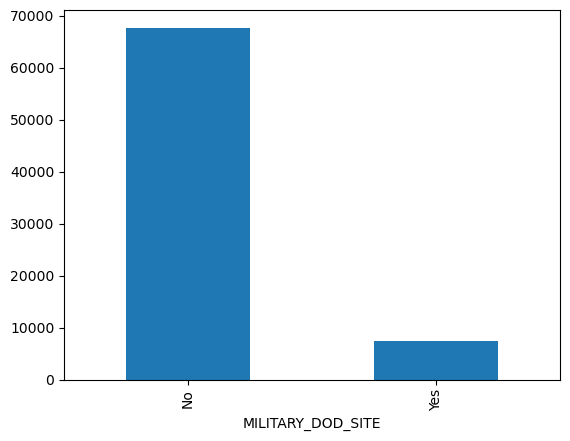

In [56]:
df['MILITARY_DOD_SITE'].value_counts().plot(kind='bar');

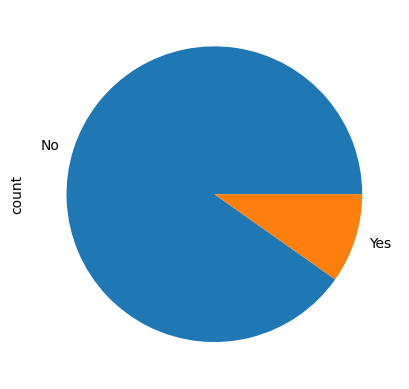

In [24]:
df['MILITARY_DOD_SITE'].value_counts().plot(kind='pie');

In [21]:
lowest_score=df[df['CALENVIROSCREEN4_SCORE'] == '1-5% (lowest scores)']
lowest_score

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
23,T10000017049,Los Altos Cleaners,392,1st Street,Los Altos,CA,94022,Santa Clara,9,37.375460,...,NaN,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,1-5% (lowest scores),1-5% (lowest scores),No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
43,T0607546124,CHEVRON SERVICE STATION 9-0308,2399,MARKET STREET,SAN FRANCISCO,CA,94114,San Francisco,9,37.762647,...,unknown,NaN,South Bay - San Mateo Bayside (204.40),Downtown (2-040),NaN,6-10%,1-5% (lowest scores),No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
159,NPD100051993,Hill Canyon WWTP,9600,Santa Rosa Road,Camarillo,CA,93012,Ventura,9,34.210560,...,NaN,NaN,Calleguas - Calleguas-Conejo - Conejo Valley (...,NaN,NaN,6-10%,1-5% (lowest scores),No,NaN,LOS ANGELES RWQCB (REGION 4)
184,NPD100052061,Vallecitos WD Meadowlark WRP,7941,Corintia Street,Carlsbad,CA,92009,San Diego,9,33.103420,...,NaN,NaN,Carlsbad - San Marcos - Batiquitos (904.51),NaN,NaN,6-10%,1-5% (lowest scores),No,NaN,SAN DIEGO RWQCB (REGION 9)
210,L10004005233,Coyote Canyon Landfill (Closed),20661,Newport Coast Drive,Newport Beach,CA,92657,Orange,9,33.618171,...,NaN,NaN,Santa Ana River - Lower Santa Ana River - East...,NaN,NaN,6-10%,1-5% (lowest scores),No,Title 27 - Municipal Solid Waste Landfill,SANTA ANA RWQCB (REGION 8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74816,T0608100621,PRIVATE RESIDENCE,NaN,PRIVATE RESIDENCE,WOODSIDE,CA,94062,San Mateo,9,37.417320,...,NaN,1992-02-29T00:00:00Z,Santa Clara - Palo Alto (205.50),NaN,NaN,6-10%,1-5% (lowest scores),No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
74821,T0608154199,COSTA DO SOL,NaN,CAMINO DE LAS ONDAS,CARLSBAD,CA,92008,San Diego,9,33.110260,...,NaN,1995-11-01T00:00:00Z,Carlsbad - San Marcos - Batiquitos (904.51),NaN,NaN,11-15%,1-5% (lowest scores),No,NaN,SAN DIEGO RWQCB (REGION 9)
74893,T0608137549,SMCO CORP YARD,29,TOWER,SAN MATEO,CA,94402,San Mateo,9,37.510994,...,NaN,2013-03-29T00:00:00Z,South Bay - San Mateo Bayside (204.40),NaN,NaN,16-20%,1-5% (lowest scores),No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
74916,T0607301328,DASH IN MINI MART,10299,SCRIPPS TL,SAN DIEGO,CA,921312366,San Diego,9,32.914029,...,NaN,2000-02-09T00:00:00Z,Penasquitos - Miramar Reservoir (906.10),NaN,NaN,1-5% (lowest scores),1-5% (lowest scores),No,NaN,SAN DIEGO RWQCB (REGION 9)


In [20]:
high_score=df[df['CALENVIROSCREEN4_SCORE'] == '95-100% (highest scores)']
high_score

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
17,T10000002482,Delta Marine Sales and Services,401,North San Jose Street,Stockton,CA,95201,San Joaquin,9,37.954119,...,NaN,NaN,San Joaquin Delta (544.00),San Joaquin Valley - Eastern San Joaquin (5-02...,Severely Disadvantaged Community,96-100% (highest scores),95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
118,NPD100051632,Rialto WWRF,501,East Santa Ana Avenue,Bloomington,CA,92316-2911,San Bernardino,9,34.055240,...,NaN,NaN,Santa Ana River - Middle Santa Ana River - Riv...,Upper Santa Ana Valley - Riverside-Arlington (...,NaN,96-100% (highest scores),95-100% (highest scores),No,NaN,SANTA ANA RWQCB (REGION 8)
126,NPD100051544,Vallejo Flood & Wastewater District (VFWD) WWTP,450,Ryder Street,Vallejo,CA,94590,Solano,9,38.091264,...,NaN,NaN,San Pablo - Napa River (206.50),Napa-Sonoma Valley - Napa-Sonoma Lowlands (2-0...,Severely Disadvantaged Community,86-90%,95-100% (highest scores),No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
135,NPD100051583,"Turlock City, Turlock Regional Water Quality C...",901,South Walnut Road,Turlock,CA,95380,Stanislaus,9,37.481169,...,NaN,NaN,San Joaquin Valley Floor - Turlock (535.50),San Joaquin Valley - Turlock (5-022.03),NaN,96-100% (highest scores),95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74955,T0606700524,SHRA PROPERTY,1200,A ST (AKA: 1211),SACRAMENTO,CA,95819,Sacramento,9,38.588718,...,NaN,2003-01-16T00:00:00Z,Valley-American - Morrison Creek - Franklin (5...,Sacramento Valley - South American (5-021.65),Severely Disadvantaged Community,96-100% (highest scores),95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75000,T0610700034,SMITH AUTO PARTS,124,K ST S,DINUBA,CA,93618,Tulare,9,36.541399,...,NaN,1996-04-30T00:00:00Z,South Valley Floor - Alta (551.60),San Joaquin Valley - Kings (5-022.08),NaN,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
75036,T0607100559,LEON TENNIS TEXACO,105,W CALIFORNIA ST,ONTARIO,CA,91762,San Bernardino,9,34.055714,...,NaN,2000-03-15T00:00:00Z,Santa Ana River - Middle Santa Ana River - Chi...,Upper Santa Ana Valley - Chino (8-002.01),NaN,96-100% (highest scores),95-100% (highest scores),No,NaN,SANTA ANA RWQCB (REGION 8)
75038,T0603705046,SOPP CHEVROLET,5801,PACIFIC BLVD,HUNTINGTON PARK,CA,90255,Los Angeles,9,33.990161,...,NaN,1996-02-15T00:00:00Z,Los Angeles River - Los Angeles (412.10),Coastal Plain Of Los Angeles - Central (4-011.04),NaN,91-95%,95-100% (highest scores),No,NaN,LOS ANGELES RWQCB (REGION 4)


In [22]:
df['LEAD_AGENCY'].unique()

array(['CENTRAL COAST RWQCB (REGION 3)', 'NORTH COAST RWQCB (REGION 1)',
       'CENTRAL VALLEY RWQCB (REGION 5S)', 'SANTA CLARA COUNTY LOP',
       'CENTRAL VALLEY RWQCB (REGION 5F)',
       'COLORADO RIVER BASIN RWQCB (REGION 7)', nan,
       'SAN FRANCISCO BAY RWQCB (REGION 2)', 'SAN DIEGO RWQCB (REGION 9)',
       'CENTRAL VALLEY RWQCB (REGION 5R)', 'LOS ANGELES RWQCB (REGION 4)',
       'SANTA ANA RWQCB (REGION 8)', 'LAHONTAN RWQCB (REGION 6T)',
       'LAHONTAN RWQCB (REGION 6V)',
       'DEPARTMENT OF TOXIC SUBSTANCES CONTROL', 'SACRAMENTO COUNTY LOP',
       'SAN MATEO COUNTY LOP', 'SAN LUIS OBISPO COUNTY',
       'SAN JOAQUIN COUNTY', 'ORANGE COUNTY LOP', 'SAN BERNARDINO COUNTY',
       'KERN COUNTY', 'STANISLAUS COUNTY', 'TULARE COUNTY',
       'ALAMEDA COUNTY LOP', 'LOS ANGELES, CITY OF',
       'SAN FRANCISCO COUNTY', 'LOS ANGELES COUNTY', 'VENTURA COUNTY',
       'HAYWARD, CITY OF', 'SONOMA COUNTY LOP', 'SAN DIEGO COUNTY LOP',
       'SANTA BARBARA COUNTY', 'SOLANO COUNTY 

In [23]:
df['LEAD_AGENCY'].value_counts()

LEAD_AGENCY
LOS ANGELES RWQCB (REGION 4)          11011
SAN FRANCISCO BAY RWQCB (REGION 2)     6554
SAN DIEGO COUNTY LOP                   5724
CENTRAL VALLEY RWQCB (REGION 5S)       5438
CENTRAL VALLEY RWQCB (REGION 5F)       3188
                                      ...  
MARIN COUNTY                              2
MARIPOSA COUNTY                           1
SIERRA COUNTY                             1
MODOC COUNTY                              1
DEPARTMENT OF FORESTRY                    1
Name: count, Length: 103, dtype: int64

In [25]:
df['STATUS'].unique()

array(['Open - Long Term Management', 'Open - Remediation', 'Active',
       'Open - Site Assessment', 'Active - Permitted',
       'Open - Assessment & Interim Remedial Action',
       'Open - Eligible for Closure', 'Pending Review',
       'Open - Verification Monitoring', 'Historical',
       'Open - Closed/with Monitoring', 'Completed - Case Closed',
       'Open - Operating', 'Open - Case Begin Date',
       'Open - Need Additional Information', 'Open',
       'Informational Item / Review Complete', 'Open - Inactive',
       '* Open - Sampling Point', 'Open - Proposed',
       'SWT-No Plan Returned', 'Historic', 'Inactive - Unpermitted',
       'USTs Permanently Closed - Report Pending', 'Abandoned SWT',
       'Received', 'Pre-Title 27 CAI - Closed/No Monitoring',
       'Active - Unpermitted',
       'Pre-Title 27 CAI - Completed - Case Closed/No Monitoring',
       'Transferred to Other Agency', 'Review Complete - Approved',
       'Safe Suction Piping Verified by CUPA', 'Unkno

In [26]:
df['STATUS'].value_counts()

STATUS
Completed - Case Closed                                     58411
Open - Site Assessment                                       3389
Informational Item / Review Complete                         2483
Open - Inactive                                              1788
Open - Remediation                                           1780
Open                                                         1022
Open - Verification Monitoring                                973
Open - Assessment & Interim Remedial Action                   880
SWT-No Plan Returned                                          586
Open - Eligible for Closure                                   437
* Open - Sampling Point                                       422
Pending Review                                                399
Open - Operating                                              312
Open - Long Term Management                                   252
Active                                                        230
Ope

In [27]:
df['QUANTITY_RELEASED_GALLONS'].value_counts()

QUANTITY_RELEASED_GALLONS
0.0          5895
1.0           114
100.0          76
10.0           67
500.0          39
             ... 
1400000.0       1
10248.0         1
75.0            1
4032.0          1
55.4            1
Name: count, Length: 249, dtype: int64

In [28]:
df[['CALENVIROSCREEN4_SCORE', 'RWQCB_REGION']].sort_values(bye='CALENVIROSCREEN4_SCORE',ascending=True).head(10)

,CALENVIROSCREEN4_SCORE,RWQCB_REGION
0,45-50%,CENTRAL COAST RWQCB (REGION 3)
1,20-25%,NORTH COAST RWQCB (REGION 1)
2,35-40%,CENTRAL COAST RWQCB (REGION 3)
3,95-100% (highest scores),CENTRAL VALLEY RWQCB (REGION 5F)
4,35-40%,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...
75058,60-65%,CENTRAL VALLEY RWQCB (REGION 5S)
75059,45-50%,SAN DIEGO RWQCB (REGION 9)
75060,10-15%,NORTH COAST RWQCB (REGION 1)
75061,55-60%,SAN DIEGO RWQCB (REGION 9)


In [5]:
df['CALENVIROSCREEN4_ST_SCORE'] = df['CALENVIROSCREEN4_SCORE'].str.split('-').str[0].astype(float)
df['CALENVIROSCREEN4_ST_SCORE']

0        45.0
1        20.0
2        35.0
3        95.0
4        35.0
         ... 
75058    60.0
75059    45.0
75060    10.0
75061    55.0
75062    55.0
Name: CALENVIROSCREEN4_ST_SCORE, Length: 75063, dtype: float64

In [6]:
df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,CALENVIROSCREEN4_ST_SCORE
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),45.0
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),20.0
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),35.0
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),95.0
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S),60.0
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,1999-03-31T00:00:00Z,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9),45.0
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,2013-03-18T00:00:00Z,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1),10.0
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,2009-04-01T00:00:00Z,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9),55.0


In [8]:
df['CALENVIROSCREEN4_ST_SCORE'].unique()

array([45., 20., 35., 95., 80., 40., 70., nan, 30., 90.,  1., 15., 60.,
       10., 85., 65., 50., 75., 55.,  5., 25.])

In [10]:
 df['CALENVIROSCREEN4_ST_SCORE'].value_counts()

CALENVIROSCREEN4_ST_SCORE
95.0    4837
80.0    4652
50.0    4378
90.0    4324
55.0    4179
70.0    4100
45.0    3992
75.0    3974
60.0    3907
85.0    3730
30.0    3407
40.0    3323
65.0    3304
25.0    3123
35.0    3113
20.0    2635
15.0    2604
10.0    2370
1.0     1962
5.0     1892
Name: count, dtype: int64

In [12]:
top_county = df['COUNTY'].value_counts().head(1)
print(top_county)

COUNTY
Los Angeles    14080
Name: count, dtype: int64


In [17]:
df

top_county = df['CITY'].value_counts().head(1)
print(top_county)

CITY
SAN DIEGO    3007
Name: count, dtype: int64


In [19]:
df.dtypes['CALENVIROSCREEN4_ST_SCORE']

dtype('float64')

In [21]:
import seaborn as sns

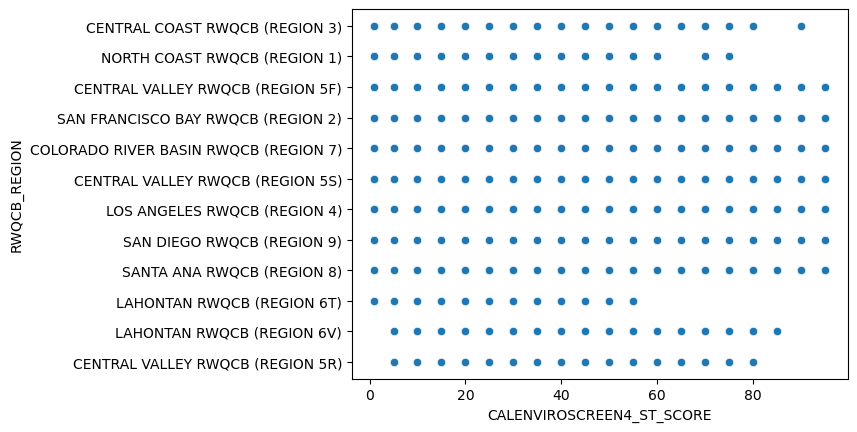

In [28]:
sns.scatterplot(df,y='RWQCB_REGION',x='CALENVIROSCREEN4_ST_SCORE');

In [30]:
df['COUNTY'].unique()

array(['Monterey', 'Sonoma', 'San Luis Obispo', 'Merced', 'Santa Clara',
       'Tulare', 'Imperial', 'El Dorado', 'Los Angeles', 'San Francisco',
       'Contra Costa', 'Placer', 'Kern', 'Napa', 'San Diego',
       'San Joaquin', 'Shasta', 'Tehama', 'Yolo', 'San Mateo', 'Orange',
       'San Benito', 'San Bernardino', 'Mendocino', 'Santa Barbara',
       'Lassen', 'Nevada', 'Solano', 'Yuba', 'Alameda', 'Calaveras',
       'Riverside', 'Plumas', 'Marin', 'Mariposa', 'Stanislaus',
       'Siskiyou', 'Santa Cruz', 'Humboldt', 'Sutter', 'Del Norte',
       'Butte', 'Fresno', 'Ventura', 'Sacramento', 'Colusa', 'Glenn',
       'Amador', 'Modoc', 'Inyo', 'Madera', 'Lake', 'Mono', 'Sierra',
       'Kings', nan, 'Tuolumne', 'Trinity', 'Alpine'], dtype=object)

In [31]:
df['CITY'].unique()

array(['Jolon', 'Santa Rosa', 'San Luis Obispo', ...,
       'OAKLAND / EMERYVILLE', 'The Geysers area, near Cobb & Middletown',
       'SAN FRANSISCO'], dtype=object)